<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plan-for-Today" data-toc-modified-id="Plan-for-Today-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plan for Today</a></span></li><li><span><a href="#Prepare-the-Data" data-toc-modified-id="Prepare-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the Data</a></span><ul class="toc-item"><li><span><a href="#Calculating-lagged-returns" data-toc-modified-id="Calculating-lagged-returns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calculating lagged returns</a></span></li><li><span><a href="#Calculating-cumulative-returns" data-toc-modified-id="Calculating-cumulative-returns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Calculating cumulative returns</a></span></li><li><span><a href="#Delete-missing-returns" data-toc-modified-id="Delete-missing-returns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Delete missing returns</a></span></li><li><span><a href="#Delete-missing-characteristics" data-toc-modified-id="Delete-missing-characteristics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Delete missing characteristics</a></span></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Summary</a></span></li></ul></li><li><span><a href="#Forcasting-Future-Excess-Returns" data-toc-modified-id="Forcasting-Future-Excess-Returns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Forcasting Future Excess Returns</a></span><ul class="toc-item"><li><span><a href="#Does-ret_11_1-forcast-future-returns?" data-toc-modified-id="Does-ret_11_1-forcast-future-returns?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Does ret_11_1 forcast future returns?</a></span></li><li><span><a href="#Does-ret1-forcast-future-returns?" data-toc-modified-id="Does-ret1-forcast-future-returns?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Does ret1 forcast future returns?</a></span></li><li><span><a href="#Does-ret11_2-forcast-future-returns?" data-toc-modified-id="Does-ret11_2-forcast-future-returns?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Does ret11_2 forcast future returns?</a></span></li><li><span><a href="#Do-ret11_2-and-ret1-together-forcast-future-returns?" data-toc-modified-id="Do-ret11_2-and-ret1-together-forcast-future-returns?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Do ret11_2 and ret1 together forcast future returns?</a></span></li><li><span><a href="#Conceptualize-the-results" data-toc-modified-id="Conceptualize-the-results-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Conceptualize the results</a></span></li></ul></li><li><span><a href="#Long-short-portfolio" data-toc-modified-id="Long-short-portfolio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Long-short portfolio</a></span><ul class="toc-item"><li><span><a href="#Sort-Portfolio" data-toc-modified-id="Sort-Portfolio-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sort Portfolio</a></span></li><li><span><a href="#Portfolio-returns" data-toc-modified-id="Portfolio-returns-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Portfolio returns</a></span></li><li><span><a href="#Compare-Sharpe-ratio" data-toc-modified-id="Compare-Sharpe-ratio-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compare Sharpe-ratio</a></span></li></ul></li><li><span><a href="#Are-there-alphas?" data-toc-modified-id="Are-there-alphas?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Are there alphas?</a></span></li><li><span><a href="#Should-we-add-Reversal-to-our-portfolio?" data-toc-modified-id="Should-we-add-Reversal-to-our-portfolio?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Should we add Reversal to our portfolio?</a></span></li><li><span><a href="#Optimal-Portfolio" data-toc-modified-id="Optimal-Portfolio-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Optimal Portfolio</a></span></li><li><span><a href="#Other-Datasets-to-Explore" data-toc-modified-id="Other-Datasets-to-Explore-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Other Datasets to Explore</a></span></li></ul></div>

# Big Data in Finance: Part II <BR><BR> Lecture 6: Performance Evaluation
   
**Instructor** <BR>
Ritt Keerati, ritt.keerati@gsb.columbia.edu
    
**TA's:** <BR>
Meha Sadasivam, MSadasivam21@gsb.columbia.edu <BR>
Daheng Yang, dyang22@gsb.columbia.edu <BR>


<sub> Credit: lecture notes originally developed by Lira Mota

## Plan for Today

**What we have covered so far**
1. Overview of CRSP
2. Overview of Compustat
3. Merge CRSP and Compustat
4. The building block of factor investment: application FF5 Factors
5. Homework: Momentum

**Plan for Today**
1. Study the mom vs. short-term reversal strategies
2. Fama-MacBeth regression
3. Alpha evaluation

## Prepare the Data

**Setup**

In [1]:
%matplotlib inline 

#%% Packages
import sys
import pandas as pd
from pandas.tseries.offsets import MonthEnd

import numpy as np
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice # for multi-index slicing

In [2]:
# Packages from fire_pytools
sys.path.append("/Users/rk2941/Dropbox/courses/big_data_2022/fire_pytools") 

from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *
from utils.post_event_nan import *

import warnings
warnings.filterwarnings('ignore')

**Prepare Data**

In [3]:
mdata = pd.read_pickle('/Users/rk2941/Dropbox/courses/big_data_2022/data/stock_monthly.pkl')

In [4]:
# Clean Data
mdata = mdata[mdata.date>='1970-01-01']      # Data start in 2010
mdata = mdata[mdata.shrcd.isin([10, 11])]    # Share type - select only common stocks 
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]  # Select stocks traded on the major stock exchanges
mdata = mdata.sort_values(['permno','date']) # Sort data

In [5]:
# Work with excess returns
mdata['exret'] = mdata['retadj'] - mdata['rf']

In [6]:
mdata.columns

Index(['permno', 'date', 'dlret', 'dlretx', 'exchcd', 'naics', 'permco', 'prc',
       'ret', 'shrcd', 'shrout', 'siccd', 'ticker', 'rankyear', 'retadj', 'me',
       'lag_me', 'lag_dlret', 'melag_weights', 'mdate', 'rf', 'exret'],
      dtype='object')

In [7]:
mdata = mdata[['permno', 'date', 'exret', 'permco','me', 'melag_weights', 'siccd', 'exchcd']].copy()

In [8]:
mdata

,permno,date,exret,permco,me,melag_weights,siccd,exchcd
1,10000,1986-01-31,NaN,7952.0,1.610000e+01,NaN,3990.0,3.0
2,10000,1986-02-28,-0.262439,7952.0,1.196000e+01,1.610000e+01,3990.0,3.0
3,10000,1986-03-31,0.359422,7952.0,1.633000e+01,1.196000e+01,3990.0,3.0
4,10000,1986-04-30,-0.103933,7952.0,1.517200e+01,1.633000e+01,3990.0,3.0
5,10000,1986-05-30,-0.227590,7952.0,1.179386e+01,1.517200e+01,3990.0,3.0
...,...,...,...,...,...,...,...,...
4809516,93436,2021-08-31,0.070556,53453.0,7.370200e+05,6.803383e+05,9999.0,3.0
4809517,93436,2021-09-30,0.054009,53453.0,7.785819e+05,7.370200e+05,9999.0,3.0
4809518,93436,2021-10-29,0.436493,53453.0,1.118751e+06,7.785819e+05,9999.0,3.0
4809519,93436,2021-11-30,0.027568,53453.0,1.149642e+06,1.118751e+06,9999.0,3.0


### Calculating lagged returns

In [9]:
# Create past returns
mdata['ret1'] = mdata.groupby('permno').exret.shift(1)

In [10]:
mdata[['permno','date','exret','ret1']].head()

,permno,date,exret,ret1
1,10000,1986-01-31,NaN,NaN
2,10000,1986-02-28,-0.262439,NaN
3,10000,1986-03-31,0.359422,-0.262439
4,10000,1986-04-30,-0.103933,0.359422
5,10000,1986-05-30,-0.227590,-0.103933


In [11]:
mdata[mdata.permno==10000].tail()

,permno,date,exret,permco,me,melag_weights,siccd,exchcd,ret1
14,10000,1987-02-27,-0.004309,7952.0,1.581531,1.581531,3990.0,3.0,-0.216272
15,10000,1987-03-31,-0.389627,7952.0,0.973250,1.581531,3990.0,3.0,-0.004309
16,10000,1987-04-30,-0.066785,7952.0,0.912422,0.973250,3990.0,3.0,-0.389627
17,10000,1987-05-29,-0.070427,7952.0,0.851594,0.912422,3990.0,3.0,-0.066785
18,10000,1987-06-30,-0.005031,7952.0,NaN,0.851594,3990.0,3.0,-0.070427


**What could be the problem with lagged return?**

* CRSP reports returns if there is a price within the last 10 periods

In [12]:
mdata['date_diff'] = mdata.groupby('permno').date.diff()

In [13]:
mdata.date_diff.describe()

count                       3094522
mean     31 days 02:41:01.710079941
std      45 days 16:11:44.309700975
min                28 days 00:00:00
25%                29 days 00:00:00
50%                31 days 00:00:00
75%                31 days 00:00:00
max             11961 days 00:00:00
Name: date_diff, dtype: object

In [14]:
# How to work with dates
mdata['date_diff'].dt.days>31

1          False
2          False
3          False
4          False
5          False
           ...  
4809516     True
4809517    False
4809518    False
4809519     True
4809520    False
Name: date_diff, Length: 3119541, dtype: bool

In [15]:
# Are there problems here?
mdata.loc[(mdata.date_diff.dt.days>31), ['permno','date', 'date_diff', 'exret','ret1']].head()

,permno,date,date_diff,exret,ret1
9,10000,1986-09-30,32 days,-0.061926,-0.619999
12,10000,1986-12-31,33 days,-0.382125,0.056076
15,10000,1987-03-31,32 days,-0.389627,-0.004309
18,10000,1987-06-30,32 days,-0.005031,-0.070427
28,10001,1986-09-30,32 days,-0.007860,0.067551


In [16]:
# What about here?
mdata.loc[(mdata.date_diff.dt.days>40), ['permno','date', 'date_diff', 'exret','ret1']].head()

,permno,date,date_diff,exret,ret1
1656,10007,1989-02-28,456 days,NaN,-0.364477
2150,10012,1987-10-30,91 days,NaN,0.072865
5465,10028,2012-11-30,245 days,-0.246609,-0.048392
8985,10050,1978-09-29,60 days,NaN,NaN
8986,10050,1978-12-29,91 days,NaN,NaN


In [17]:
# Let's look at an example
mdata.loc[((mdata.permno==10028) & (mdata.date<'2012-12-30')), ['permno','date', 'date_diff', 'exret','ret1']]

,permno,date,date_diff,exret,ret1
5144,10028,1986-02-28,NaT,NaN,NaN
5145,10028,1986-03-31,31 days,0.216259,NaN
5146,10028,1986-04-30,30 days,0.176477,0.216259
5147,10028,1986-05-30,30 days,0.148912,0.176477
5148,10028,1986-06-30,31 days,-0.138579,0.148912
...,...,...,...,...,...
5454,10028,2011-12-30,30 days,-0.036129,-0.070747
5455,10028,2012-01-31,32 days,-0.026772,-0.036129
5456,10028,2012-02-29,29 days,0.081124,-0.026772
5457,10028,2012-03-30,30 days,-0.048392,0.081124


In [18]:
# Replace errorneous return with NaN
mdata.loc[(mdata.date_diff.dt.days>40), 'ret1'] = np.nan

### Calculating cumulative returns

In [19]:
# Calculate past returns 
def calculate_cumulative_returns(mdata, tt, min_periods):
    """
    Calculate past returns for momentum stratagy

    Parameters:
    ------------
    mdata: data frame
        crsp monthly data with cols permno, date as index.
    tt: int
        number of periods to cumulate retuns
    min_periods: int
    """
    start_time = time.time()
    required_cols = ['exret']

    assert set(required_cols).issubset(mdata.columns), "Required columns: {}.".format(', '.join(required_cols))

    df = mdata[required_cols].copy()

    # Before applying the function calculate_cumulative_returns you need to make sure 
    # we don't have missing dates. Missing dates would lead to the wrong number of periods 
    # to cumulate returns.

    # Resample data 
    # CRSP data has skipping months.
    # Create line to missing  months to facilitate the calculation of lag/past returns
    df.reset_index(inplace=True)
    df['edate'] = df['date'] + MonthEnd(0)
    df.sort_values(['permno', 'edate'], inplace=True)
    pk_integrity(df, ['permno', 'edate'])
    df.set_index(['edate'], inplace=True)
    # Resample to take care of missing months
    sdf = df[['permno', 'exret']].groupby('permno').resample('M').mean().drop(columns='permno')
    sdf.reset_index(inplace=True)
    print("Time to resample data: %s seconds" % str(time.time() - start_time))
    print("We have added %s rows to the data" % str(sdf.shape[0] - df.shape[0]))

    # Cumulative Return (adjusted) in tt months
    sdf['gret'] = sdf['exret'].fillna(0)+1
    sdf['ret_notnull'] = sdf['exret'].notnull()

    cret = sdf.groupby(['permno']).gret.rolling(window=tt, min_periods=1).apply(np.prod, raw=True)
    cret.reset_index(drop=True, inplace=True)

    nona_count = sdf.groupby(['permno']).ret_notnull.rolling(window=tt, min_periods=1).apply(np.sum, raw=True)
    nona_count.reset_index(drop=True, inplace=True)

    cret[nona_count<min_periods] = np.nan
    sdf['ret' + str(tt)] = cret

    # Delete rows that were not in the original data set
    df.reset_index(inplace=True)
    fdata = pd.merge(df,
             sdf[['edate', 'permno','ret' + str(tt)]],
             on = ['edate', 'permno'])         
    fdata.set_index(['permno','date'],inplace = True)
    x = fdata['ret' + str(tt)]

    print("Time to calculate %d months past returns: %s seconds" % (tt, str(round(time.time() - start_time, 2))))

    return x

In [20]:
## Calculate 11 months returns (with at least 8 monthly returns)
mdata.set_index(['permno','date'], inplace=True)
mdata['ret11'] = calculate_cumulative_returns(mdata, 11, 8)

Time to resample data: 90.84185814857483 seconds
We have added 68342 rows to the data
Time to calculate 11 months past returns: 133.19 seconds


In [21]:
# Skip one month to make it investable
mdata['ret11_1'] = mdata.groupby('permno').ret11.shift(1)
mdata.loc[(mdata.date_diff.dt.days>40), 'ret11_1'] = np.nan

In [22]:
# Skip another month for predicting return
mdata['ret11_2'] = mdata.groupby('permno').ret11_1.shift(1)
mdata.loc[(mdata.date_diff.dt.days>40), 'ret11_2'] = np.nan

# Can also shift retl1 by 2 months instead, and check for diff_date > 70

### Delete missing returns

In [23]:
mdata = mdata[mdata['exret'].notnull()]

### Delete missing characteristics

In [24]:
mdata = mdata[mdata.ret11_1.notnull()]
mdata = mdata[mdata.ret11_2.notnull()]
mdata = mdata[mdata.ret1.notnull()]

### Data Summary

In [25]:
mdata[['exret', 'ret1', 'ret11_1', 'ret11_2']].describe()

,exret,ret1,ret11_1,ret11_2
count,2.840470e+06,2.840470e+06,2.840470e+06,2.840470e+06
mean,8.196844e-03,8.899633e-03,1.094210e+00,1.093569e+00
std,1.861559e-01,1.843803e-01,7.287419e-01,7.270090e-01
min,-1.014149e+00,-9.951580e-01,3.672953e-06,3.672953e-06
25%,-7.019119e-02,-7.017134e-02,7.485118e-01,7.484617e-01
50%,-3.751537e-03,-3.773000e-03,1.006219e+00,1.005127e+00
75%,6.867757e-02,6.909357e-02,1.282112e+00,1.280261e+00
max,2.399694e+01,2.399694e+01,1.066553e+02,1.066553e+02


## Forcasting Future Excess Returns

In [26]:
# Fama-MacBeth regression
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fm_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat']]

### Does ret_11_1 forcast future returns?

In [27]:
gamma_mom = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_1'))
gamma_mom.head()

,Intercept,ret11_1
date,,
1970-10-30,-0.188809,0.152010
1970-11-30,-0.065803,0.084473
1970-12-31,0.086035,-0.009531
1971-01-29,0.292164,-0.180847
1971-02-26,0.086903,-0.045724


<AxesSubplot:xlabel='date'>

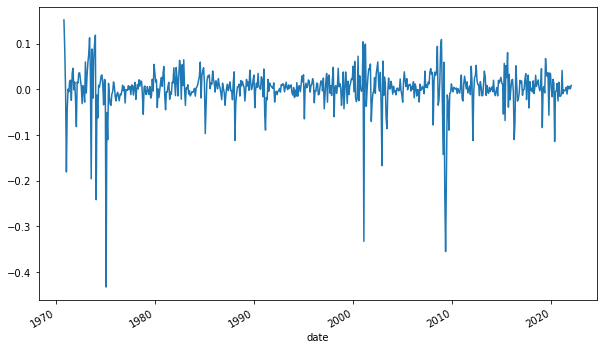

In [28]:
gamma_mom.ret11_1.plot()

In [29]:
# Fama-Macbeth regressions results
fm_summary(gamma_mom)

,mean,std_error,tstat
Intercept,0.006011,0.003290,1.826853
ret11_1,0.001311,0.001841,0.712520


### Does ret1 forcast future returns?

In [30]:
gamma_rev = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret1'))
gamma_rev.head()

,Intercept,ret1
date,,
1970-10-30,-0.033043,-0.258334
1970-11-30,0.006658,0.114236
1970-12-31,0.078616,-0.030629
1971-01-29,0.152078,-0.231514
1971-02-26,0.043502,0.002026


In [31]:
# Fama-Macbeth regressions results
fm_summary(gamma_rev) 

,mean,std_error,tstat
Intercept,0.008103,0.002314,3.501246
ret1,-0.041859,0.004180,-10.014465


### Does ret11_2 forcast future returns?

In [32]:
gamma_mom2 = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_2'))
gamma_mom2.head()

,Intercept,ret11_2
date,,
1970-10-30,-0.207653,0.192657
1970-11-30,-0.074125,0.090033
1970-12-31,0.084399,-0.007466
1971-01-29,0.268664,-0.174306
1971-02-26,0.088120,-0.050674


In [33]:
# Fama-Macbeth regressions results
fm_summary(gamma_mom2)

,mean,std_error,tstat
Intercept,0.002629,0.003129,0.840246
ret11_2,0.004962,0.001650,3.006933


### Do ret11_2 and ret1 together forcast future returns?

In [34]:
# Fama-Macbeth regressions results
gamma = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_2 + ret1'))
fm_summary(gamma)

,mean,std_error,tstat
Intercept,0.002296,0.003020,0.760240
ret11_2,0.005011,0.001579,3.172553
ret1,-0.042884,0.003948,-10.862325


### Conceptualize the results
<img src="momentum.png" width="800" height="400">

## Long-short portfolio

### Sort Portfolio

In [35]:
# Calculate size
mdata['mesum'] = mdata.groupby(['date', 'permco']).me.transform(np.sum, min_count=1)

In [36]:
# Make sure size is not N/A
mdata = mdata[mdata.mesum.notnull()]

In [37]:
# Reset index
mdata.reset_index(inplace=True)

In [38]:
# Sort portfolio monthly
port = sort_portfolios(data = mdata,
                       quantiles={'mesum': [0.5],
                                  'ret11_2': [0.3, 0.7],
                                  'ret11_1': [0.3, 0.7],
                                  'ret1': [0.3, 0.7]},
                       id_variables=['date', 'permno', 'exchcd'],
                       exch_cd=[1])

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret11_2.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret11_1.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret1.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00


**Look at the data**

In [39]:
port[port.permno==10006].head()

,date,permno,ret1portfolio,ret11_1portfolio,ret11_2portfolio,mesumportfolio
0,1970-10-30,10006.0,ret12,ret11_12,ret11_22,mesum2
2152,1970-11-30,10006.0,ret12,ret11_12,ret11_22,mesum2
4320,1970-12-31,10006.0,ret13,ret11_12,ret11_22,mesum2
6499,1971-01-29,10006.0,ret11,ret11_12,ret11_22,mesum2
8687,1971-02-26,10006.0,ret12,ret11_12,ret11_22,mesum2


### Portfolio returns

**Merge data**

In [40]:
fdata = pd.merge(mdata[['permno', 'date', 'exret', 'melag_weights']], 
                port,
                on = ['permno', 'date']) 

In [41]:
fdata

,permno,date,exret,melag_weights,ret1portfolio,ret11_1portfolio,ret11_2portfolio,mesumportfolio
0,10000,1986-11-28,0.056076,3.002344e+00,ret11,ret11_11,ret11_21,mesum1
1,10000,1986-12-31,-0.382125,3.182484e+00,ret13,ret11_11,ret11_21,mesum1
2,10000,1987-01-30,-0.216272,1.981547e+00,ret11,ret11_11,ret11_21,mesum1
3,10000,1987-02-27,-0.004309,1.581531e+00,ret11,ret11_11,ret11_21,mesum1
4,10000,1987-03-31,-0.389627,1.581531e+00,ret11,ret11_11,ret11_21,mesum1
...,...,...,...,...,...,...,...,...
2821022,93436,2021-08-31,0.070556,6.803383e+05,ret12,ret11_12,ret11_23,mesum2
2821023,93436,2021-09-30,0.054009,7.370200e+05,ret13,ret11_12,ret11_22,mesum2
2821024,93436,2021-10-29,0.436493,7.785819e+05,ret13,ret11_13,ret11_22,mesum2
2821025,93436,2021-11-30,0.027568,1.118751e+06,ret13,ret11_13,ret11_23,mesum2


Which portfolio did Apple belong to in 2020?

In [42]:
fdata[(fdata.permno==14593) & (fdata.date.dt.year>=2020)]

,permno,date,exret,melag_weights,ret1portfolio,ret11_1portfolio,ret11_2portfolio,mesumportfolio
319543,14593,2020-01-31,0.052846,1.287643e+06,ret13,ret11_13,ret11_23,mesum2
319544,14593,2020-02-28,-0.115518,1.354255e+06,ret13,ret11_13,ret11_23,mesum2
319545,14593,2020-03-31,-0.071029,1.196081e+06,ret12,ret11_13,ret11_23,mesum2
319546,14593,2020-04-30,0.155371,1.099547e+06,ret13,ret11_13,ret11_23,mesum2
319547,14593,2020-05-29,0.084897,1.273428e+06,ret12,ret11_13,ret11_23,mesum2
319548,14593,2020-06-30,0.147275,1.378058e+06,ret12,ret11_13,ret11_23,mesum2
319549,14593,2020-07-31,0.165036,1.562781e+06,ret13,ret11_13,ret11_23,mesum2
319550,14593,2020-08-31,0.216230,1.817316e+06,ret13,ret11_13,ret11_23,mesum2
319551,14593,2020-09-30,-0.102602,2.206911e+06,ret13,ret11_13,ret11_23,mesum2
319552,14593,2020-10-30,-0.060085,1.966079e+06,ret11,ret11_13,ret11_23,mesum2


**Calculate returns**

In [43]:
# Reversal Returns 
rev = fdata.groupby(['date', 
                     'mesumportfolio', 
                     'ret1portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                   weights = x['melag_weights']))

In [44]:
rev

date        mesumportfolio  ret1portfolio
1970-10-30  mesum1          ret11           -0.025202
                            ret12           -0.055249
                            ret13           -0.101283
            mesum2          ret11           -0.009772
                            ret12           -0.018604
                                               ...   
2021-12-31  mesum1          ret12            0.027340
                            ret13            0.003851
            mesum2          ret11            0.041109
                            ret12            0.047687
                            ret13            0.015045
Length: 3690, dtype: float64

In [45]:
rev = rev.unstack(level=[1, 2])

In [46]:
rev

mesumportfolio    mesum1                        mesum2                    
ret1portfolio      ret11     ret12     ret13     ret11     ret12     ret13
date                                                                      
1970-10-30     -0.025202 -0.055249 -0.101283 -0.009772 -0.018604 -0.061833
1970-11-30     -0.007556  0.007791  0.013077  0.057785  0.055633  0.043627
1970-12-31      0.089769  0.073310  0.065054  0.077108  0.059134  0.045373
1971-01-29      0.133908  0.109467  0.076747  0.043691  0.037085  0.059520
1971-02-26      0.049126  0.032587  0.023697  0.017585  0.004421  0.011798
...                  ...       ...       ...       ...       ...       ...
2021-08-31      0.005903 -0.001340  0.025343  0.017823  0.029381  0.032801
2021-09-30     -0.042146 -0.032445 -0.034841 -0.026280 -0.047683 -0.047991
2021-10-29      0.011688  0.019883  0.023230  0.062294  0.062706  0.093832
2021-11-30     -0.082699 -0.038545 -0.066360 -0.041840 -0.003094 -0.008213
2021-12-31     -0.023623  0.027340  0.003851  0.041109  0.047687  0.015045

[615 rows x 6 columns]

In [47]:
rev_ret = rev.loc[:, idx[:, 'ret13']].mean(axis=1)-rev.loc[:, idx[:, 'ret11']].mean(axis=1)
rev_ret = rev_ret.to_frame('rev')

In [48]:
# Momentum not skipping 1-month
mom2 = fdata.groupby(['date', 
                      'mesumportfolio', 
                      'ret11_1portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                weights = x['melag_weights']))
mom2 = mom2.unstack(level=[1, 2])
mom2_ret = mom2.loc[:, idx[:, 'ret11_13']].mean(axis=1)-mom2.loc[:, idx[:, 'ret11_11']].mean(axis=1)
mom2_ret = mom2_ret.to_frame('mom2')

In [49]:
# Momemtum Returns
mom = fdata.groupby(['date', 
                     'mesumportfolio', 
                     'ret11_2portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                weights = x['melag_weights']))
mom = mom.unstack(level=[1, 2])
mom_ret = mom.loc[:, idx[:, 'ret11_23']].mean(axis=1)-mom.loc[:, idx[:, 'ret11_21']].mean(axis=1)
mom_ret = mom_ret.to_frame('mom')

In [50]:
ret = mom_ret.join(rev_ret)
ret = ret.join(mom2_ret)

**Long-short portfolio returns**

<AxesSubplot:xlabel='date'>

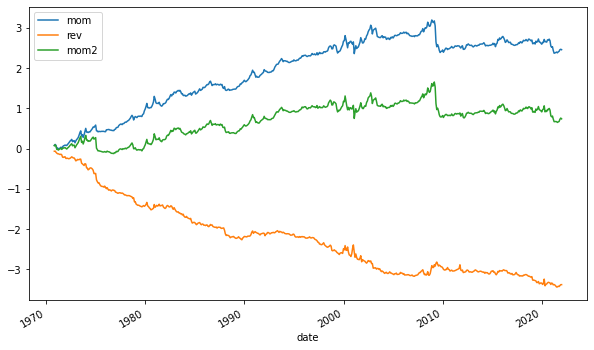

In [51]:
np.log(1+ret).cumsum().plot()

In [52]:
# Reversal with equal weight
rev2 = fdata.groupby(['date', 
                      'mesumportfolio', 
                      'ret1portfolio']).apply(lambda x: np.average(x['exret']))
rev2 = rev2.unstack(level=[1, 2])
rev2_ret = rev2.loc[:, idx[:, 'ret13']].mean(axis=1)-rev2.loc[:, idx[:, 'ret11']].mean(axis=1)
rev2_ret = rev2_ret.to_frame('rev2')

ret= ret.join(rev2_ret)

<AxesSubplot:xlabel='date'>

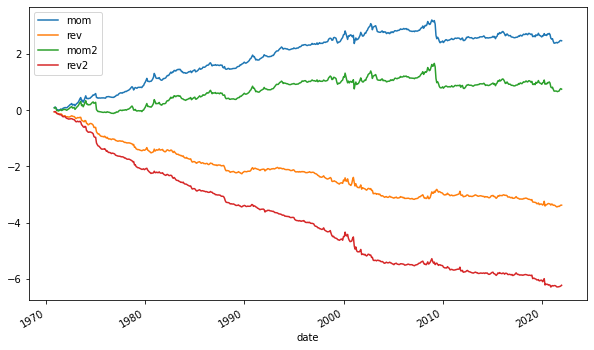

In [53]:
np.log(1+ret).cumsum().plot()

### Compare Sharpe-ratio

In [54]:
(ret.mean()/ret.std())*np.sqrt(12)

mom     0.404532
rev    -0.526083
mom2    0.174745
rev2   -0.969398
dtype: float64

Is Sharpe ratio the only/main thing we care about?

## Are there alphas?

In [55]:
# FF5 factor
ff = kf_factors(ff_factor_file='F-F_Research_Data_5_Factors_2x3', freq='monthly')
ff.drop(columns=['date'], inplace=True)
ff_ret = ff.set_index('mdate')/100
ff_ret.rename(columns = {'Mkt-RF': 'MktRF'}, inplace=True)

In [56]:
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF,mdate
0,-0.39,-0.44,-0.89,0.68,-1.23,0.27,196307
1,5.07,-0.75,1.68,0.36,-0.34,0.25,196308
2,-1.57,-0.55,0.08,-0.71,0.29,0.27,196309
3,2.53,-1.37,-0.14,2.80,-2.02,0.29,196310
4,-0.85,-0.89,1.81,-0.51,2.31,0.27,196311
...,...,...,...,...,...,...,...
698,-4.37,1.25,5.09,-1.94,2.08,0.00,202109
699,6.65,-2.69,-0.44,1.74,-1.48,0.00,202110
700,-1.55,-1.74,-0.53,7.38,1.60,0.00,202111
701,3.10,-0.68,3.23,4.75,4.37,0.01,202112


**Merge our data with FF5 factors**

In [57]:
ret.reset_index(inplace=True)
ret['mdate'] = ret.date.dt.year * 100 +  ret.date.dt.month

In [58]:
ret.set_index('mdate', inplace=True)

In [59]:
# Merge 
ret = ret.join(ff_ret)
ret.reset_index(inplace=True)
ret.set_index('date', inplace=True)

In [60]:
ret

,mdate,mom,rev,mom2,rev2,MktRF,SMB,HML,RMW,CMA,RF
date,,,,,,,,,,,
1970-10-30,197010,0.083603,-0.064071,0.073112,-0.062213,-0.0228,-0.0443,0.0021,0.0171,0.0232,0.0046
1970-11-30,197011,0.023131,0.003238,0.023705,0.009348,0.0460,-0.0386,0.0170,0.0156,0.0148,0.0046
1970-12-31,197012,-0.022009,-0.028225,-0.034313,-0.024298,0.0572,0.0293,0.0099,0.0024,0.0029,0.0042
1971-01-29,197101,-0.070859,-0.020666,-0.076117,-0.045204,0.0484,0.0754,0.0148,-0.0199,0.0006,0.0038
1971-02-26,197102,0.003639,-0.015608,-0.002177,-0.008825,0.0141,0.0204,-0.0127,0.0058,-0.0069,0.0033
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,202108,0.024879,0.017209,0.014472,0.002749,0.0290,-0.0079,-0.0013,-0.0026,-0.0167,0.0000
2021-09-30,202109,0.012821,-0.007203,0.008545,0.006751,-0.0437,0.0125,0.0509,-0.0194,0.0208,0.0000
2021-10-29,202110,0.039870,0.021540,0.055191,0.007051,0.0665,-0.0269,-0.0044,0.0174,-0.0148,0.0000


In [61]:
smf.ols('mom ~ MktRF', data=ret.loc['2010-01-01':]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           0.000180
Time:                        14:55:02   Log-Likelihood:                 289.35
No. Observations:                 144   AIC:                            -574.7
Df Residuals:                     142   BIC:                            -568.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.003      1.319      0.189      -0.002       0.009
MktRF         -0.2523      0.066     -3.847      0.000      -0.382      -0.123
==============================================================================
Omnibus:                        4.764   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.415
Skew:                          -0.323   Prob(JB):                        0.110
Kurtosis:                       3.565   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
smf.ols('mom ~ MktRF', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     22.96
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.08e-06
Time:                        14:55:02   Log-Likelihood:                 1084.8
No. Observations:                 615   AIC:                            -2166.
Df Residuals:                     613   BIC:                            -2157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.002      3.593      0.000       0.003       0.009
MktRF         -0.1772      0.037     -4.792      0.000      -0.250      -0.105
==============================================================================
Omnibus:                      218.705   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1948.345
Skew:                          -1.317   Prob(JB):                         0.00
Kurtosis:                      11.312   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
smf.ols('mom ~ MktRF + SMB + HML', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     23.47
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.19e-14
Time:                        14:55:02   Log-Likelihood:                 1107.1
No. Observations:                 615   AIC:                            -2206.
Df Residuals:                     611   BIC:                            -2188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.002      4.491      0.000       0.004       0.011
MktRF         -0.2191      0.038     -5.784      0.000      -0.294      -0.145
SMB           -0.0569      0.056     -1.023      0.307      -0.166       0.052
HML           -0.3672      0.055     -6.624      0.000      -0.476      -0.258
==============================================================================
Omnibus:                      218.081   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1933.559
Skew:                          -1.314   Prob(JB):                         0.00
Kurtosis:                      11.280   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
smf.ols('mom ~ MktRF + SMB + HML + RMW + CMA', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     17.50
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           3.24e-16
Time:                        14:55:02   Log-Likelihood:                 1114.8
No. Observations:                 615   AIC:                            -2218.
Df Residuals:                     609   BIC:                            -2191.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0057      0.002      3.395      0.001       0.002       0.009
MktRF         -0.1682      0.040     -4.220      0.000      -0.246      -0.090
SMB           -0.0108      0.059     -0.184      0.854      -0.126       0.105
HML           -0.5384      0.073     -7.382      0.000      -0.682      -0.395
RMW            0.2011      0.078      2.595      0.010       0.049       0.353
CMA            0.3868      0.118      3.279      0.001       0.155       0.618
==============================================================================
Omnibus:                      205.331   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1723.653
Skew:                          -1.236   Prob(JB):                         0.00
Kurtosis:                      10.820   Cond. No.                         81.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Should we add Reversal to our portfolio?

In [65]:
smf.ols('rev ~ MktRF + SMB + HML + RMW + CMA + mom', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     22.68
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           3.48e-24
Time:                        14:55:02   Log-Likelihood:                 1296.2
No. Observations:                 615   AIC:                            -2578.
Df Residuals:                     608   BIC:                            -2547.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0047      0.001     -3.738      0.000      -0.007      -0.002
MktRF         -0.1665      0.030     -5.527      0.000      -0.226      -0.107
SMB           -0.1117      0.044     -2.549      0.011      -0.198      -0.026
HML           -0.1252      0.057     -2.207      0.028      -0.237      -0.014
RMW            0.0106      0.058      0.183      0.855      -0.103       0.125
CMA            0.1620      0.089      1.827      0.068      -0.012       0.336
mom            0.1799      0.030      5.957      0.000       0.121       0.239
==============================================================================
Omnibus:                       87.581   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.274
Skew:                          -0.085   Prob(JB):                    4.03e-205
Kurtosis:                       9.058   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
ret.drop(columns='mdate', inplace = True)

<AxesSubplot:xlabel='date'>

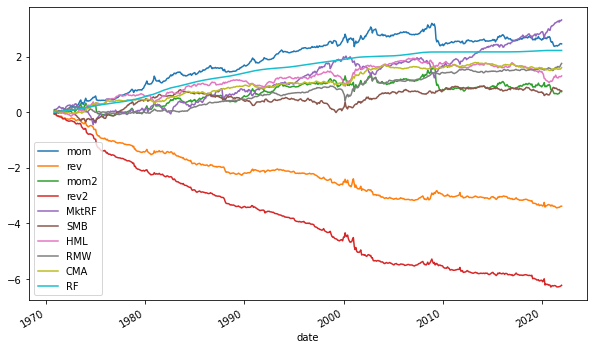

In [67]:
np.log(1+ret).cumsum().plot()

## Optimal Portfolio

Consider mean-variance preferences:

$$ \max_{\phi}\; (\mu-R_f\iota)'\phi - \frac{1}{2}\alpha\phi'\Sigma\phi $$

FOC:

$$ \phi = \frac{1}{\alpha}\Sigma^{-1}(\mu-R_f\iota) $$

In [68]:
rcov = ret[['MktRF', 'SMB', 'HML', 'RMW', 'CMA']].cov()

In [69]:
rcov

,MktRF,SMB,HML,RMW,CMA
MktRF,0.002054,0.000350,-0.000289,-0.000222,-0.000325
SMB,0.000350,0.000911,-0.000002,-0.000264,-0.000019
HML,-0.000289,-0.000002,0.000897,0.000096,0.000386
RMW,-0.000222,-0.000264,0.000096,0.000525,0.000019
CMA,-0.000325,-0.000019,0.000386,0.000019,0.000374


In [70]:
ret[['MktRF', 'SMB', 'HML', 'RMW', 'CMA']].mean()

MktRF    0.006449
SMB      0.001699
HML      0.002573
RMW      0.003120
CMA      0.002797
dtype: float64

## Other Datasets to Explore

* Capital IQ
* FactSet
* Orbis / Amadeus
* Compustat Global
* Mergent FISD
* Bond Returns by WRDS